#The Penguin Dataset

#Clustering

In [94]:
!pip install palmerpenguins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering , KMeans ,DBSCAN
from scipy.cluster.hierarchy import dendrogram , linkage 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

In [96]:
df=load_penguins()
df=df.drop(['island','year','sex'],axis=1).dropna().rename(columns={'species':'y'})
df.shape

(342, 5)

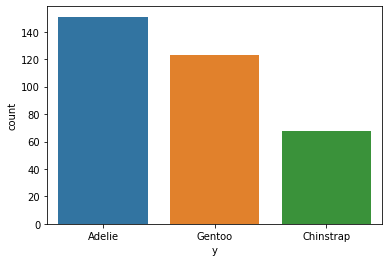

In [97]:
sns.countplot(x='y',data=df);

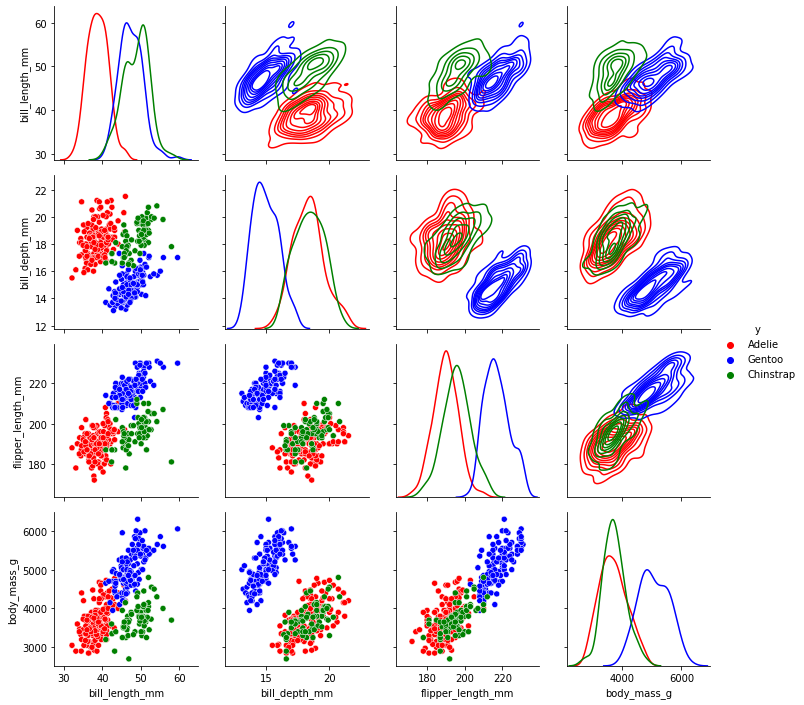

In [98]:
g=sns.PairGrid(df,vars=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'],hue='y',diag_sharey=False,palette=['red','blue','green'])
g.map_diag(sns.distplot,hist=False)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)
g.add_legend();

# Heirarchy (AgglomerativeClustering)

y=df.y

In [99]:
Y=df.y
df=df.drop('y',axis=1)

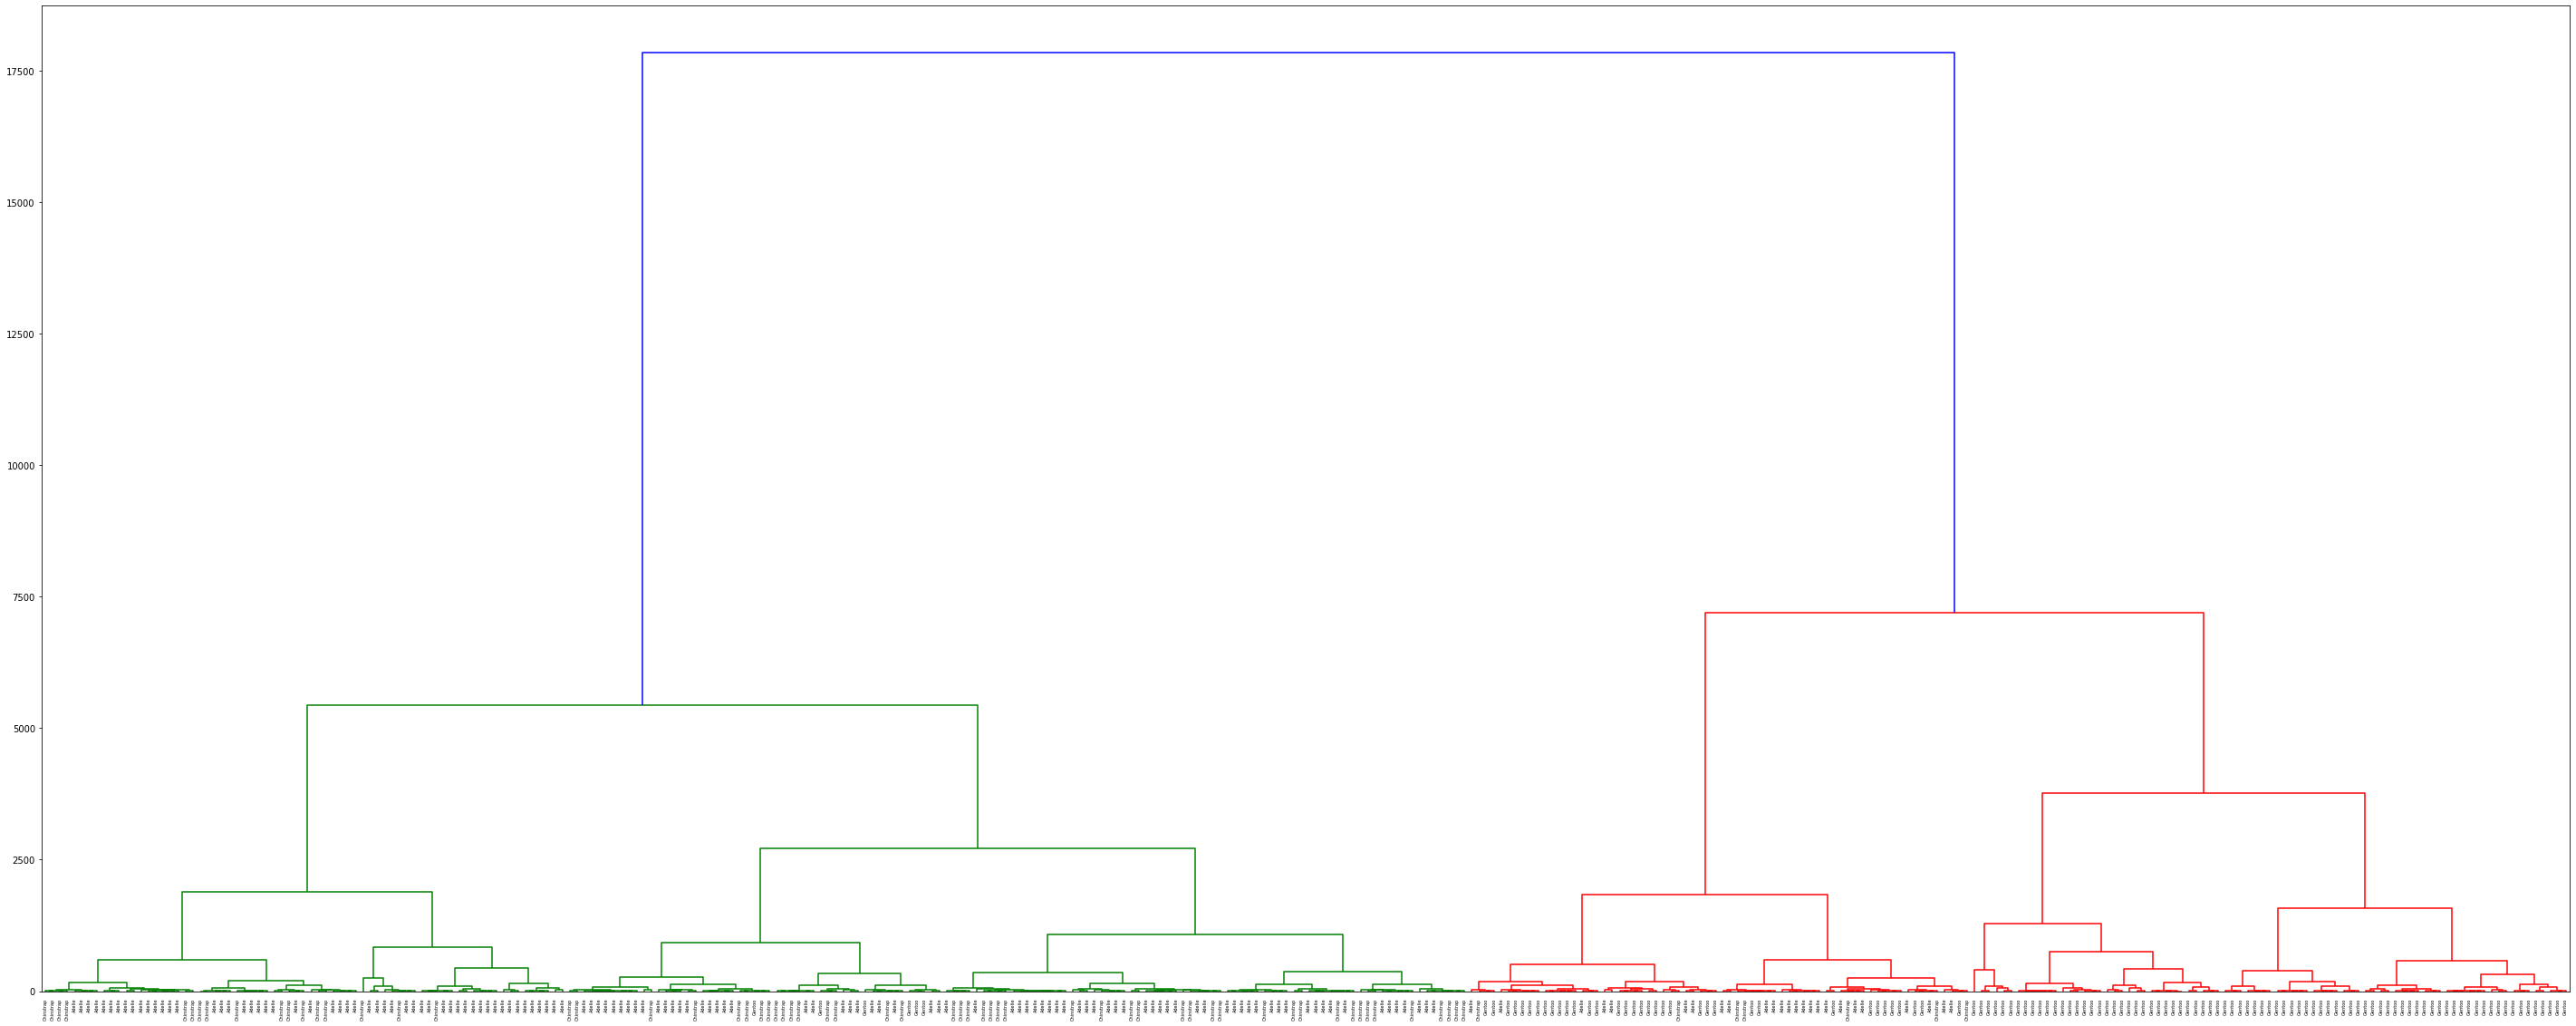

In [100]:
hc =linkage(df,method='ward')
fig =plt.figure(figsize=(50,20))
dn=dendrogram(hc,leaf_label_func=lambda x: Y.values[x]);

#K-Mean

In [101]:
df=pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)
df.head(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703


In [102]:
km=KMeans(n_clusters=3,random_state=1,init='k-means++',n_init=10)
km.fit(df)
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

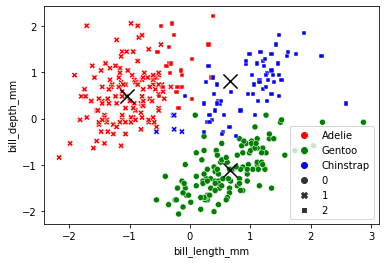

In [103]:
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',data=df,hue=Y.values,style=km.labels_,palette=['red','green','blue'])
plt.scatter(x=km.cluster_centers_[:,0],y=km.cluster_centers_[:,1],marker='x',s=200,c='black');

# K-Means : Optimize Via Silhouette Scores

In [104]:
def s2(estimator,x):
  return silhouette_score(x,estimator.predict(x))
param = range(2,10)
km = KMeans(random_state=0,init='k-means++')
grid = GridSearchCV(km,{'n_clusters':param},scoring=s2,cv=2)
grid.fit(df)
best_km=grid.best_estimator_
best_km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

Text(0, 0.5, 'Silhouette Score')

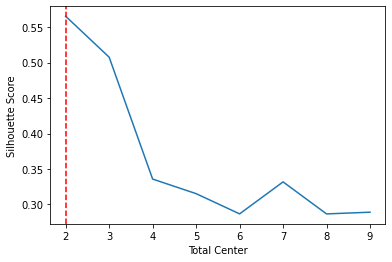

In [105]:
plt.plot(param,grid.cv_results_['mean_test_score'])
plt.axvline(x=best_km.n_clusters,color='red',ls='--')
plt.xlabel('Total Center')
plt.ylabel('Silhouette Score')

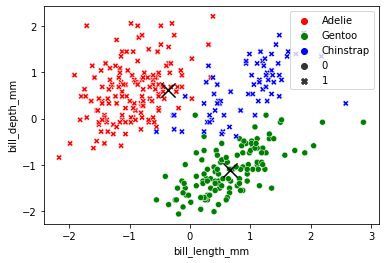

In [106]:
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',data=df,hue=Y.values,style=best_km.labels_,palette=['red','green','blue'])
plt.scatter(x=best_km.cluster_centers_[:,0],y=best_km.cluster_centers_[:,1],marker='x',s=200,c='black');

#DBSCAN

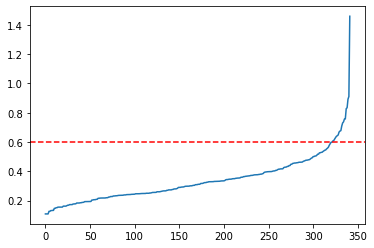

In [107]:
k=3
nn = NearestNeighbors(n_neighbors=k).fit(df)
dist ,ind=nn.kneighbors(df)
dist=np.sort(dist,axis=0)[:,1]
plt.plot(dist)
plt.axhline(y=0.6,color='red',ls='--')

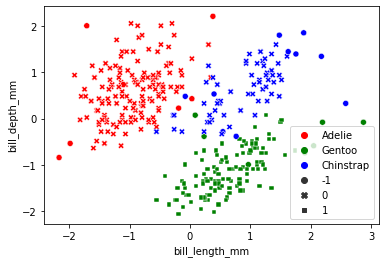

In [108]:
db=DBSCAN(eps=0.6,min_samples=k).fit(df)
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',data=df,hue=Y.values,style=db.labels_,palette=['red','green','blue']);